# AirBnB data project
The project will be divided into several parts:
- 1 Business Understanding
- 2 Data Understanding
- 3 Data Preparation
- 4 Modeling
- 5 Evaluation
- 6 Deploy



## 1 Business Understanding
Host always wants to earn more money

Airbnb always intrigued me. The company uses a crowdsourcing model to 'replace' hotel and provide hosts' properties to travelers in need. Of course, using this model, the traveling cost becomes significantly cheaper since they are no longer required to pay fees such as service charge.
 ###  房屋经营者如何挣更多的钱？
 +   一年当中，那个时间是淡季、那些时间是旺季，价格如何变化？
     + 同区域、同类型房子，价格在一年中如何变化？
 +   在淡季，提高入住率。
     + 如何提高入住率？
     + 入住率和那些因素有关？
         + What prompt us to choose your property within the huge listing at Airbnb?
         + Is reviews helpful for choosing airbnb?
         + 点评分数和入住率有关吗？
         + 点评分数和那些因素有关？
 +   在旺季，更高的价格
     + 旺季，游客更关注什么？
     + 不关注的地方，是否可以节省可变成本？

## 2 Data Understanding
It includes the following steps:
  -  Data gethering
  -  Data assessment

In order to get a better understanding of the data I will be looking at throughout this project, I will check the characteristics of the dataset. First, let's read in the data and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline


### 2.1 Data Gethering
Kaggle provides the Airbnb Seattle datasets, I download them for the analysis.

In [2]:
calendar = pd.read_csv("./seattle/calendar.csv")
listings = pd.read_csv("./seattle/listings.csv")
reviews = pd.read_csv("./seattle/reviews.csv")

### 2.2 Data assessment
  1. Get the number of rows and columns in this dataset.
      - 1) Get the shape 
      - 2) Get the data type and memory use
      - 3) Get rows example 
  2. Assess missing values distribution
      - 1) Get missing values distribution of columns/rows
      - 2) Get a set of column names that have no missing values.
      - 3) Get a set of column names that have more than target percents(e.g. 40%) if their values missing.
      - 4) Get a set of column names that have less than target percents if their values missing. They need to be imputed.
  3. Assess unique value for column. if it is unique value, the column can be removed.
  4. classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue. Get the following lists:
      - 1) drop columns list
      - 2) fullfill columns list
      - 3) imputation columns list
  4. Assess values distribution for object type.
      - 1) Check non-numeric columns
      - 2) Select columns to inspect further if columns are unclear in step 1.


In [3]:
def get_base_info(df):
    """
     The function is created to get the number of rows and columns in this dataset.
      - 1) Get the shape 
      - 2) Get the data type and memory use
      - 3) Get the rows example 
     Input:
        df: Dataframe, dataset 
     Return:
        NA
    """
    #Get the shape
    rows_num, columns_num=df.shape
    print( "The dataset contains {} rows and {} columns\n".format( rows_num,columns_num))
    
    #Get the data type and memory use
    if type(calendar) != pd.DataFrame:
        print("It is {},not a DataFrame. exit!".format(type(df)))
        return
    # Show all columns
    original_max_rows_setting= pd.options.display.max_rows
    pd.options.display.max_rows=columns_num
    df.info()
    # restore the orignal setting
    pd.options.display.max_rows=original_max_rows_setting
    
    # Get the rows example 
    show_rows(df)

def show_rows(df,n=5):
    #Get the shape
    rows_num, columns_num=df.shape
    # Show all columns
    original_max_rows_setting= pd.options.display.max_rows
    # Get the rows example 
    if pd.options.display.max_columns > columns_num:
        print("\nShow the dataset example:")
        print(df.head(n))
    else:
        print("\ncolum number is too large. Transpose the columns to show 3 rows")
        if pd.options.display.max_columns > columns_num:
            print( df.iloc[:3,:].T)
        else:
            pd.options.display.max_rows = columns_num
            print(pd.options.display.max_rows)
            print( df.iloc[:3,:].T)
            pd.options.display.max_rows = original_max_rows_setting

In [4]:
def assess_missing_value(df,drop_threshold=40):
    """
    Function description: Assess missing values distribution
      - 1) Get missing values distribution of columns/rows
      - 2) Get a set of column names that have no missing values.
      - 3) Get a set of column name that have more than target percents(e.g. 75%) if their values missing.
    Input:
        df: Dataframe, dataset 
    Return:
        full_cols_list: list, the columns lists has no misssing values.  
        most_missing_cols_list: list, the columns lists has  missing rate is greater than drop_threshold.  
        impute_cols_list: list, the columns lists has missing rate less than target percents if their values missing. 
                          They need to be imputed. 
    """
    #1) Get missing values distribution of columns and rows
    #  Check columns distribution
    bins=[0,5,10,15,20,25,30,40,50,60,70,80,100]
    df_missing_rate=df.isnull().mean()*100
    missing_col_cuts=pd.cut(df_missing_rate,bins)
    plt.figure(figsize=(8,5))
    pd.value_counts(missing_col_cuts, sort=False).plot('bar', title="Columns distribution with missing value percentage")
    #  Check rows distribution
    plt.figure(figsize=(8,5))
    df_missing_row=df.isnull().mean(axis=1)*100
    df_missing_row_cuts=pd.cut(df_missing_row,bins)
    pd.value_counts(df_missing_row_cuts, sort=False).plot('bar',title="Rows distribution with missing value percentage" )

    #2) Get a set of column names that have no missing values.
    # analyze missing data rate for columns in listings
    full_cols_list=df_missing_rate[df_missing_rate==0].index.values.tolist()
    
    #3) Get a set of column name that have more than target percents(e.g. 75%) if their values missing.
    most_missing_cols_list=df_missing_rate[df_missing_rate>drop_threshold].index.values.tolist()
    
    #4) Get a set of column names that have less than target percents if their values missing. They need to be imputed.
    impute_cols_list=df_missing_rate[((df_missing_rate<=drop_threshold)&(df_missing_rate>0))].index.values.tolist()
    
    return full_cols_list, most_missing_cols_list,impute_cols_list

def get_missing_rate(df,column_name):
    return df[column_name].isnull().mean()*100
    

In [5]:
def assess_unique_value(df):
    """
    Function description: 
        Assess unique value for column. if it is unique value, the column can be removed.
    Input:
        df: Dataframe, dataset 
    Return:
        unique_cols_list: list, the columns list that have unique value. It is useless in the analysis.    
    """
    # scan all columns, i is column position. Store value count in a colum
    value_count=[df.iloc[:,i].unique().size for i in range(df.shape[1])]
    # value_count = 1 : means unique value in a column. find out the column position  list and flatten to 1 D array.
    unique_col_id =np.argwhere(np.array(value_count) == 1).flatten()
    # get the columns list that have unique value
    unique_cols_list=df.iloc[:,unique_col_id].columns.values.tolist()
    return unique_cols_list

In [6]:
# The following functions are used for classifying by actions
def union_cols_list(list1,list2):
    return list(set(list1) | set(list2))
def intersection_cols_list(list1,list2):
    return list(set(list1) & set(list2))
def minus_cols_list(list1,list2):
    return list(set(list1) - set(list2))
def print_cols_list(list,action):
    print("\n{} {} columns are following:\n {}".format(len(list),action,list))

In [7]:
def check_nonnumeric_cols(df):
    """
    Function description: Check non-numeric columns. 
    Input:
        df: Dataframe, dataset 
    Return:
        nonnumeric_cols_list: list, the columns list whose type is nonnumeric. It may be category.  
    """
    # Get colum type is nonnumeric(string and others)
    cat_df=df.select_dtypes(include=['object'])
    show_rows(cat_df)
    nonnumeric_cols_list = cat_df.columns.values.tolist()
    return nonnumeric_cols_list

In [8]:
def assess_nonnumeric(df, column_name):
    """
    Function description: 
       Assess values distribution for Category type. if it is unique value, the column can be removed.
    Input:
        df: Dataframe, dataset 
        column_name: colum name to be assessed.
    Return:
        col_desc: pandas.DataFrame, the value distribution for the column.   
    """
    value_dist =df[column_name].value_counts() # value_count can handle NaN value but seaborn cannot.
    value_dist=(value_dist/df.shape[0])
    value_dist.plot(kind="bar", figsize=(12,5) );
    plt.title("values distribution of {} columns".format(column_name))
    
    # return statics info
    a = df[column_name].describe().reset_index()
    b = value_dist[:10].reset_index()
    col_desc=pd.concat([a,b])
    return col_desc

In [9]:
def check_numeric_cols(df):
    """
    Function description: Check numeric columns. 
    Input:
        df: Dataframe, dataset 
    Return:
        numeric_cols_list: list, the columns list whose type is nonnumeric. It may be category.  
    """
    # Get colum type is nonnumeric(string and others)
    num_df=df.select_dtypes(exclude=['object'])
    show_rows(num_df)
    numeric_cols_list = num_df.columns.values.tolist()
    return numeric_cols_list

In [10]:
def assess_full_numeric(df, num_full_cols_list):
    """
    Function description: 
       Assess values distribution for columns with no missing value. 
    Input:
        df: Dataframe, dataset 
        num_full_cols_list:full numeric columns to be assessed.
    Return:
        NA   
    """
    for col in num_full_cols_list:
        plt.figure(figsize=(10,8))
        sns.distplot(df[col], label=col)
        plt.title('Distribution for full numeric column: {}'.format(col))
        plt.legend();

In [11]:
check_nonnumeric_cols(calendar)


Show the dataset example:
         date available   price
0  2016-01-04         t  $85.00
1  2016-01-05         t  $85.00
2  2016-01-06         f     NaN
3  2016-01-07         f     NaN
4  2016-01-08         f     NaN


['date', 'available', 'price']

#### 2.2.1 Assess calendar dataset

In [12]:
get_base_info(calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB

Show the dataset example:
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN



3 no missing columns are following:
 ['listing_id', 'date', 'available']

0 most missing columns are following:
 []

1 imputing columns are following:
 ['price']


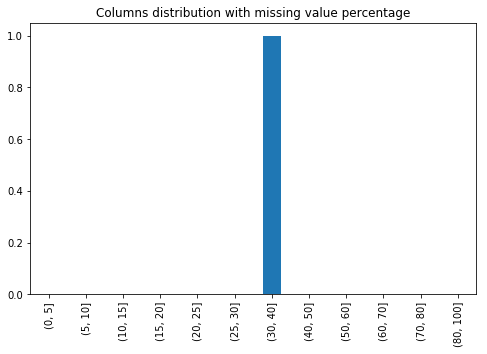

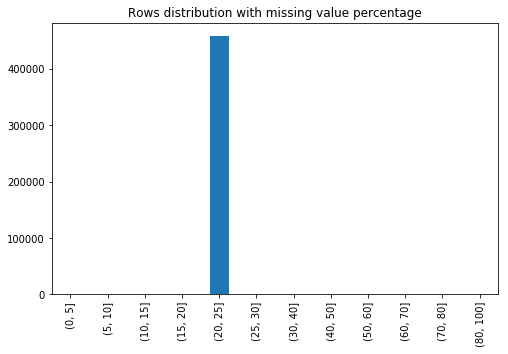

In [13]:
full_cols_c, most_missing_cols_c , impute_cols_c=assess_missing_value(calendar)
print_cols_list(full_cols_c,'no missing')
print_cols_list(most_missing_cols_c,'most missing')
print_cols_list(impute_cols_c,'imputing')

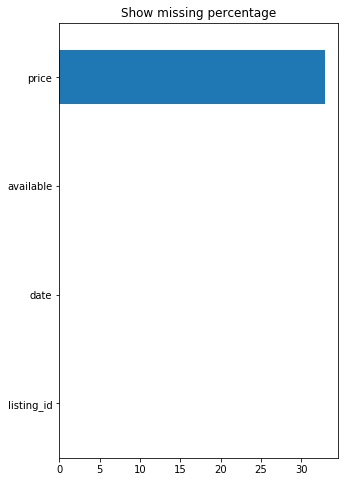

In [14]:
 #show missing percentage barh
(calendar.isnull().mean()*100).sort_values(ascending=True)[-30:].plot.barh(title="Show missing percentage",figsize=(5,8));

In [15]:
unique_cols_c=assess_unique_value(calendar)
print_cols_list(unique_cols_c,'unique')


0 unique columns are following:
 []


In [16]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_list=calendar.columns.values.tolist()
drop_cols_c=union_cols_list(most_missing_cols_c,unique_cols_c)
keep_cols_c=minus_cols_list(all_cols_list,drop_cols_c)
keep_full_cols_c=intersection_cols_list(keep_cols_c,full_cols_c)
keep_impute_cols_c=intersection_cols_list(keep_cols_c,impute_cols_c)

print_cols_list(drop_cols_c,'dropping')
print_cols_list(keep_full_cols_c,'no missing')
print_cols_list(keep_impute_cols_c,'imputing')


0 dropping columns are following:
 []

3 no missing columns are following:
 ['listing_id', 'date', 'available']

1 imputing columns are following:
 ['price']


In [17]:
print(get_missing_rate(calendar,'price'))

32.9389983998


In [18]:
pd.to_datetime(calendar['date']).describe()

count                 1393570
unique                    365
top       2016-12-27 00:00:00
freq                     3818
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

In [19]:
c_nonnumeric_cols_list=check_nonnumeric_cols(calendar)


Show the dataset example:
         date available   price
0  2016-01-04         t  $85.00
1  2016-01-05         t  $85.00
2  2016-01-06         f     NaN
3  2016-01-07         f     NaN
4  2016-01-08         f     NaN


In [20]:
a = calendar['available'].describe().reset_index()
b = calendar['available'].value_counts().reset_index()
c=pd.concat([a,b])
c

,index,available
0,count,1393570
1,unique,2
2,top,t
3,freq,934542
0,t,934542
1,f,459028


,index,available
0,count,1393570
1,unique,2
2,top,t
3,freq,934542
0,t,0.67061
1,f,0.32939


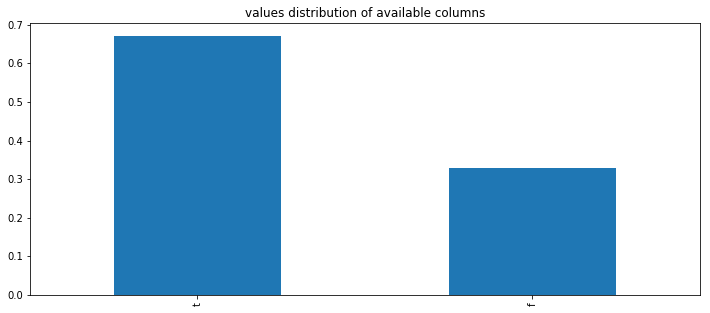

In [21]:
assess_nonnumeric(calendar,'available')

,index,price
0,count,934542
1,unique,669
2,top,$150.00
3,freq,36646
0,$150.00,0.0262965
1,$100.00,0.0227868
2,$75.00,0.0213983
3,$125.00,0.0197608
4,$65.00,0.0189549
5,$90.00,0.0178979


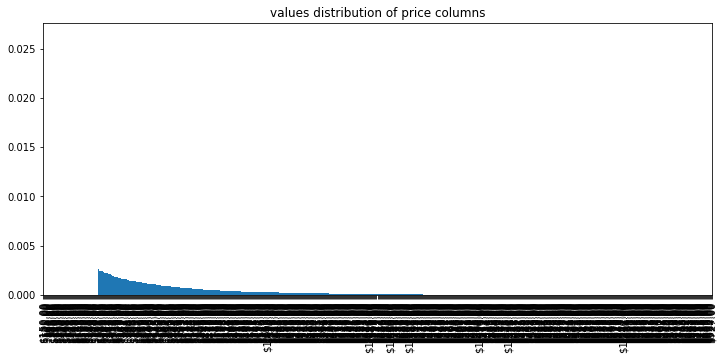

In [22]:
assess_nonnumeric(calendar,'price')[:10]

### Conclusion
 - No missing value columns: listing_id ,date ,available
      - data colum should be converted to datatime type.
      - available column should be convert to bool type.
 - Price column with about missing value. they miss value while available is false. the rows with missing price value can be set to 0. Special char e.g. '$ ,' should be removed. the column should be coverted to float type.

 

#### 2.2.2 Assess listings dataset

In [23]:
get_base_info(listings)

The dataset contains 3818 rows and 92 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null 


47 no missing columns are following:
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']

6 most missing columns are following:
 ['notes', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'license']

39 

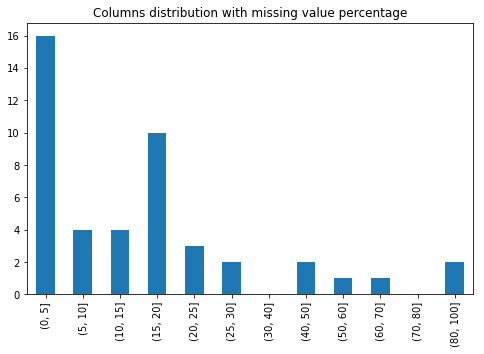

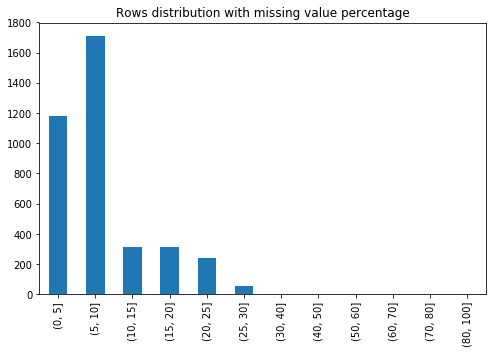

In [24]:
full_cols_l, most_missing_cols_l , impute_cols_l=assess_missing_value(listings)
print_cols_list(full_cols_l,'no missing')
print_cols_list(most_missing_cols_l,'most missing')
print_cols_list(impute_cols_l,'imputing')

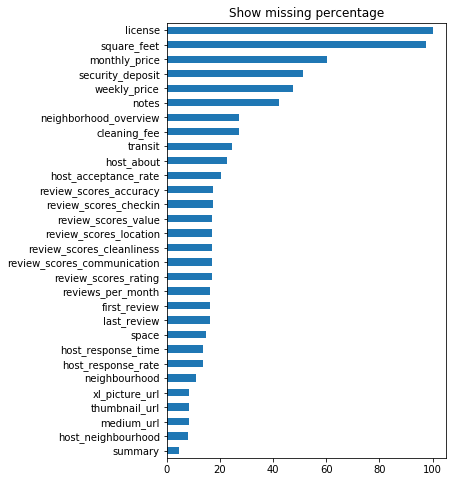

In [25]:
 #show missing percentage barh
(listings.isnull().mean()*100).sort_values(ascending=True)[-30:].plot.barh(title="Show missing percentage",figsize=(5,8));

In [26]:
unique_cols_l=assess_unique_value(listings)
print_cols_list(unique_cols_l,'unique')


11 unique columns are following:
 ['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names']


In [93]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_l_list=listings.columns.values.tolist()
drop_cols_l=union_cols_list(most_missing_cols_l,unique_cols_l)
keep_cols_l=minus_cols_list(all_cols_l_list,drop_cols_l)
keep_full_cols_l=intersection_cols_list(keep_cols_l,full_cols_l)
keep_impute_cols_l=intersection_cols_list(keep_cols_l,impute_cols_l)

print_cols_list(drop_cols_l,'dropping')
print_cols_list(keep_full_cols_l,'no missing')
print_cols_list(keep_impute_cols_l,'imputing')


16 dropping columns are following:
 ['requires_license', 'last_scraped', 'country', 'experiences_offered', 'country_code', 'has_availability', 'jurisdiction_names', 'calendar_last_scraped', 'monthly_price', 'security_deposit', 'license', 'scrape_id', 'notes', 'weekly_price', 'square_feet', 'market']

37 no missing columns are following:
 ['host_verifications', 'availability_90', 'listing_url', 'calendar_updated', 'street', 'latitude', 'is_location_exact', 'availability_365', 'minimum_nights', 'availability_30', 'guests_included', 'neighbourhood_group_cleansed', 'city', 'longitude', 'calculated_host_listings_count', 'neighbourhood_cleansed', 'availability_60', 'bed_type', 'host_url', 'accommodates', 'require_guest_profile_picture', 'smart_location', 'cancellation_policy', 'require_guest_phone_verification', 'picture_url', 'price', 'description', 'extra_people', 'number_of_reviews', 'instant_bookable', 'host_id', 'amenities', 'room_type', 'id', 'state', 'name', 'maximum_nights']

39 imp

In [28]:
num_full_cols_list=check_numeric_cols(listings[keep_full_cols_l])
len(num_full_cols_list)


Show the dataset example:
   availability_90   latitude  availability_365  minimum_nights  \
0               71  47.636289               346               1   
1               16  47.639123               291               2   
2               17  47.629724               220               4   
3                0  47.638473               143               1   
4               90  47.632918               365               1   

   availability_30  guests_included   longitude  \
0               14                2 -122.371025   
1               13                1 -122.365666   
2                1               10 -122.369483   
3                0                1 -122.369279   
4               30                6 -122.372471   

   calculated_host_listings_count  availability_60  accommodates  \
0                               2               41             4   
1                               6               13             4   
2                               2                6         

14

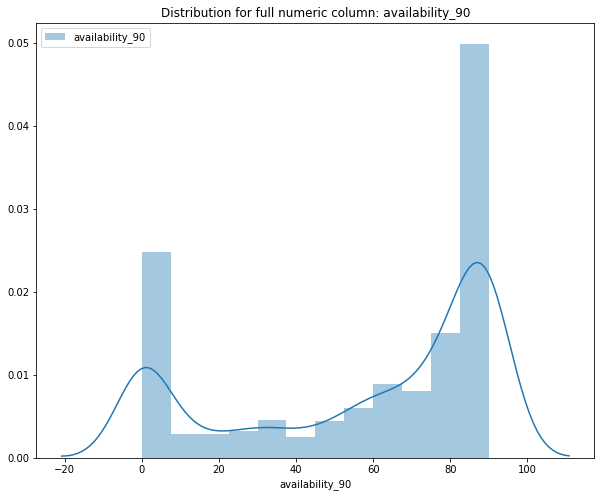

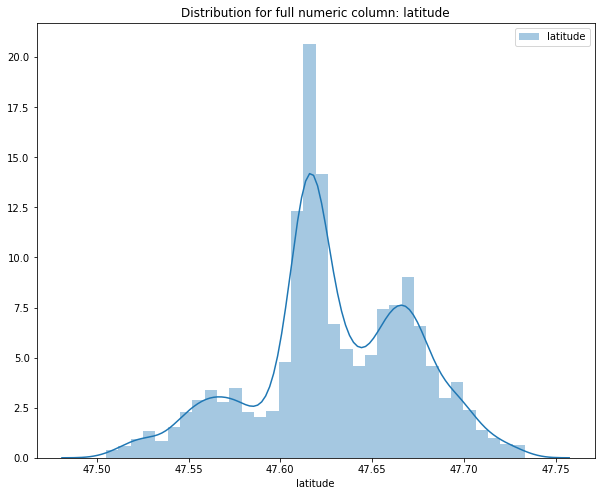

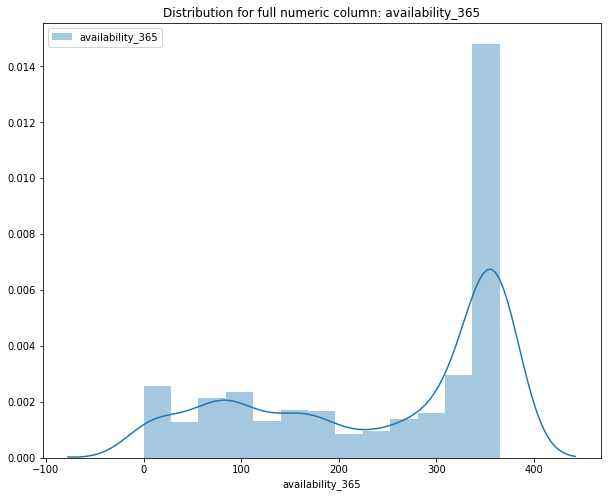

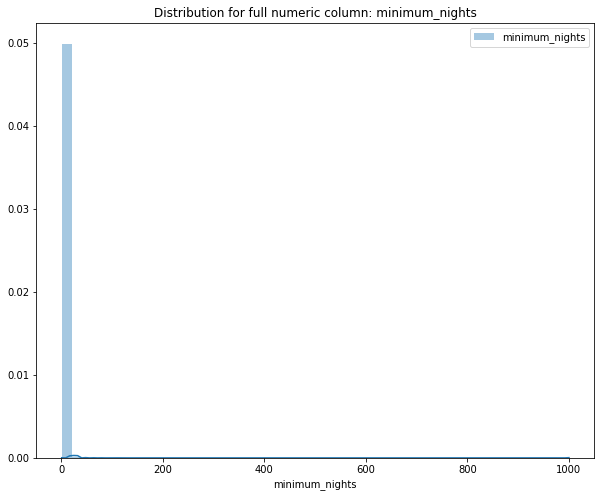

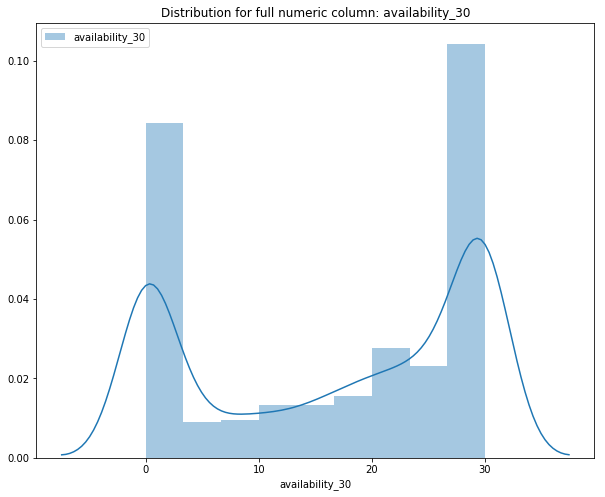

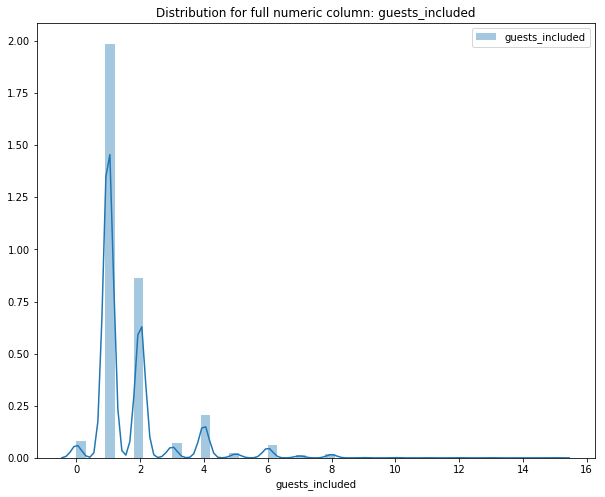

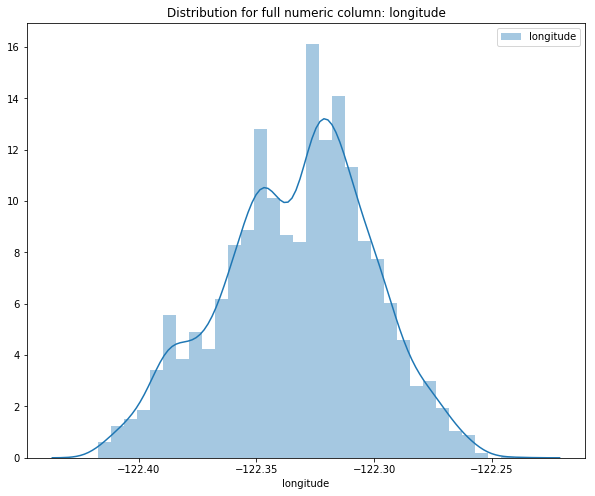

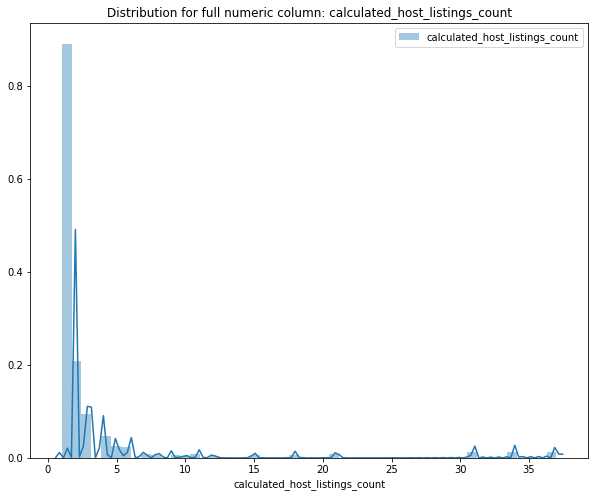

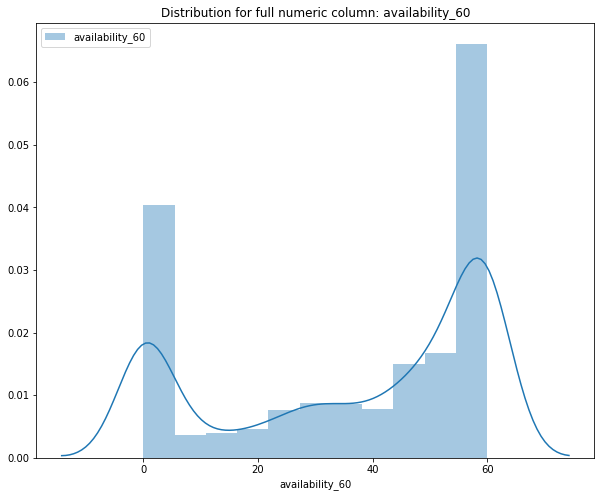

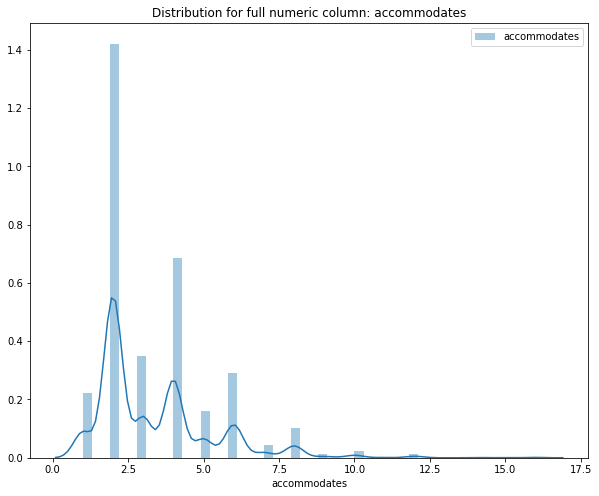

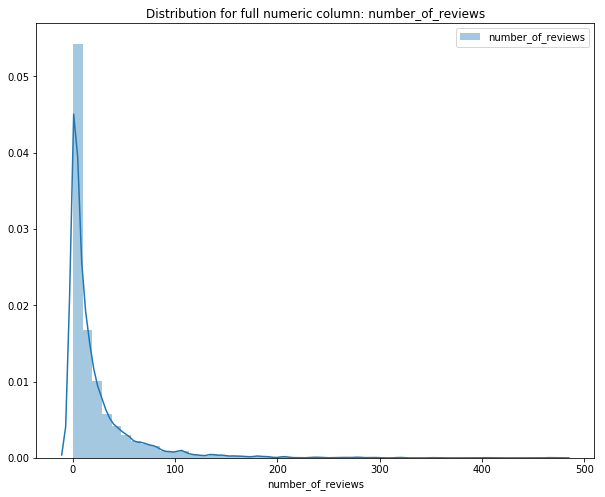

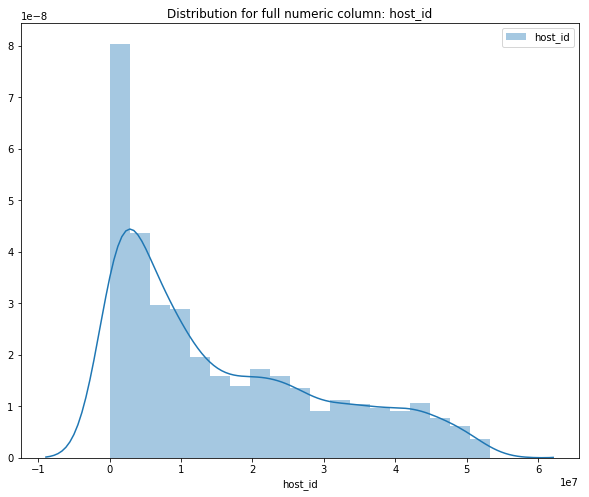

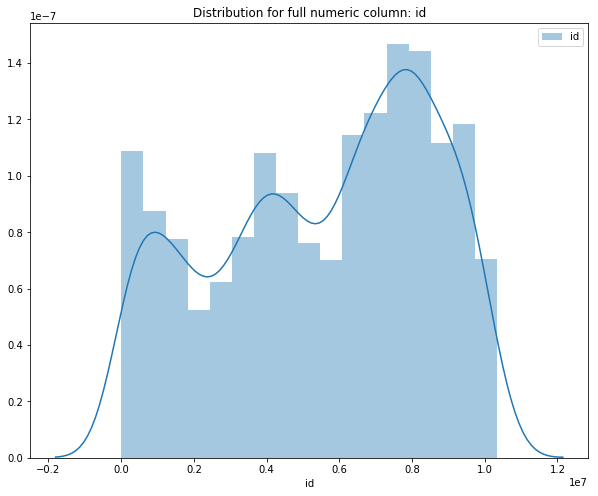

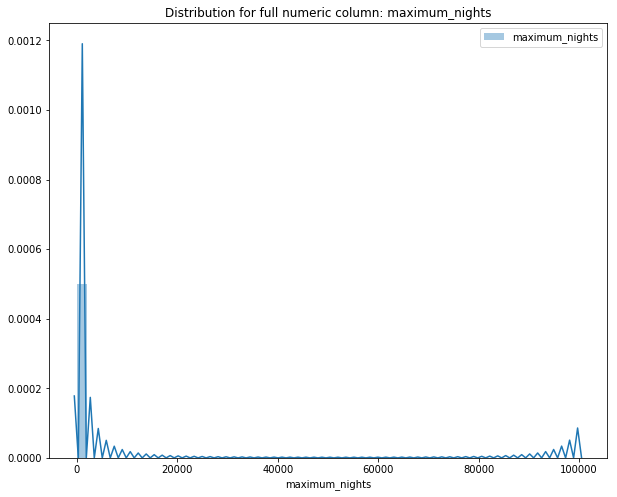

In [29]:
assess_full_numeric(listings,num_full_cols_list)

In [30]:
num_impute_cols_list=check_numeric_cols(listings[keep_impute_cols_l])
len(num_impute_cols_list)


Show the dataset example:
   review_scores_checkin  bedrooms  review_scores_communication  bathrooms  \
0                   10.0       1.0                         10.0        1.0   
1                   10.0       1.0                         10.0        1.0   
2                   10.0       5.0                         10.0        4.5   
3                    NaN       0.0                          NaN        1.0   
4                   10.0       3.0                         10.0        2.0   

   review_scores_cleanliness  review_scores_rating  review_scores_location  \
0                       10.0                  95.0                     9.0   
1                       10.0                  96.0                    10.0   
2                       10.0                  97.0                    10.0   
3                        NaN                   NaN                     NaN   
4                        9.0                  92.0                     9.0   

   host_listings_count  reviews_per

13

In [31]:
l_nonnumeric_cols_list=check_nonnumeric_cols(listings[keep_full_cols_l])


colum number is too large. Transpose the columns to show 3 rows
23
                                                                                  0  \
host_verifications                             ['email', 'phone', 'reviews', 'kba']   
listing_url                                     https://www.airbnb.com/rooms/241032   
calendar_updated                                                        4 weeks ago   
street                                Gilman Dr W, Seattle, WA 98119, United States   
is_location_exact                                                                 t   
neighbourhood_group_cleansed                                             Queen Anne   
city                                                                        Seattle   
neighbourhood_cleansed                                              West Queen Anne   
bed_type                                                                   Real Bed   
host_url                                   https://www.airbnb.

In [32]:
(listings['require_guest_phone_verification']==listings['require_guest_profile_picture']).mean()*100

97.852278679937143

,index,is_location_exact
0,count,3818
1,unique,2
2,top,t
3,freq,3412
0,t,0.893662
1,f,0.106338


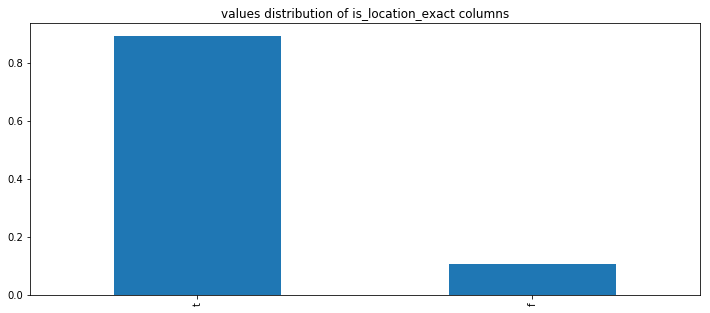

In [33]:
assess_nonnumeric(listings,'is_location_exact')

In [34]:
l_nonnumeric_impute_cols_list=check_nonnumeric_cols(listings[keep_impute_cols_l])


colum number is too large. Transpose the columns to show 3 rows
26
                                                                        0  \
space                   Make your self at home in this charming one-be...   
host_is_superhost                                                       f   
thumbnail_url                                                         NaN   
host_name                                                           Maija   
first_review                                                   2011-11-01   
host_since                                                     2011-08-11   
host_response_time                                     within a few hours   
medium_url                                                            NaN   
neighbourhood                                                  Queen Anne   
host_location                          Seattle, Washington, United States   
host_identity_verified                                                  t   
host_pic

,index,host_response_time
0,count,3295
1,unique,4
2,top,within an hour
3,freq,1692
0,within an hour,0.443164
1,within a few hours,0.253536
2,within a day,0.156365
3,a few days or more,0.00995285


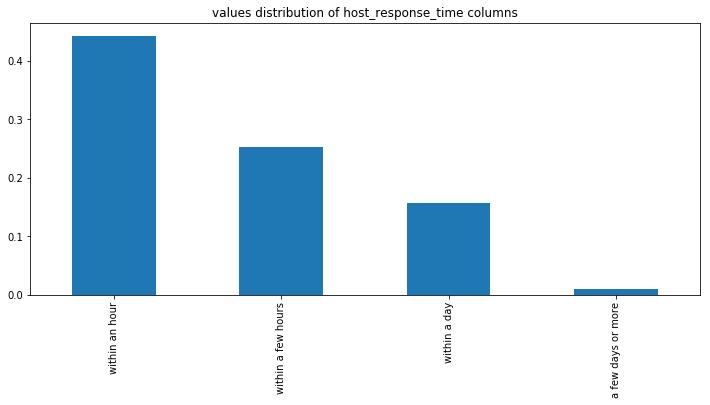

In [35]:
assess_nonnumeric(listings,'host_response_time')

,index,require_guest_profile_picture
0,count,3818
1,unique,2
2,top,f
3,freq,3497
0,f,0.915925
1,t,0.0840754


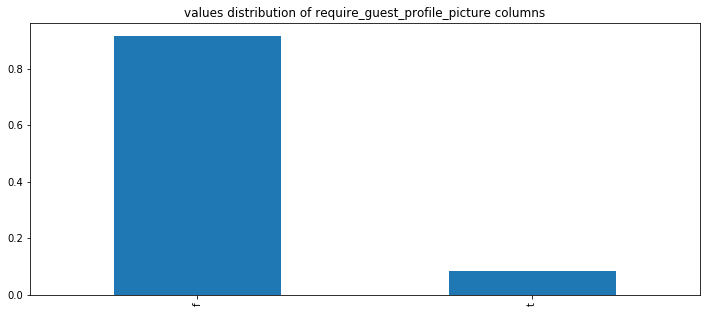

In [36]:
assess_nonnumeric(listings,'require_guest_profile_picture')

,index,property_type
0,count,3817
1,unique,16
2,top,House
3,freq,1733
0,House,0.453903
1,Apartment,0.447355
2,Townhouse,0.0309062
3,Condominium,0.0238345
4,Loft,0.0104767
5,Bed & Breakfast,0.00969094


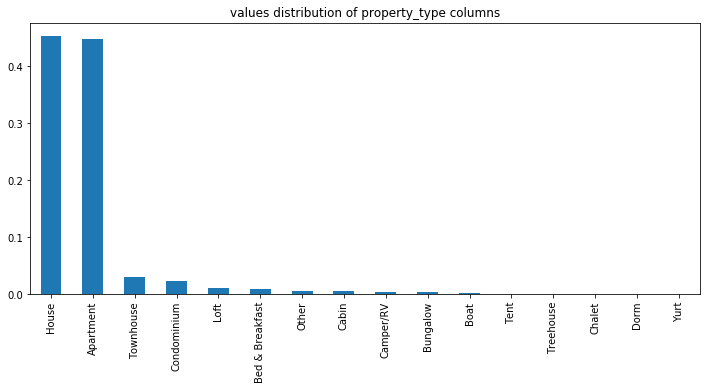

In [37]:
assess_nonnumeric(listings,'property_type')

In [38]:
listings['property_type'].isnull().mean()

0.00026191723415400735

The most important property_type are following. others can be skipped.
- House              0.453903
- Apartment          0.447355
- Townhouse          0.030906
- Condominium        0.023834
- Loft               0.010477

,index,calendar_updated
0,count,3818
1,unique,34
2,top,today
3,freq,706
0,today,0.184914
1,2 weeks ago,0.0908853
2,3 weeks ago,0.0785752
3,2 months ago,0.0735987
4,a week ago,0.0649555
5,yesterday,0.0605029


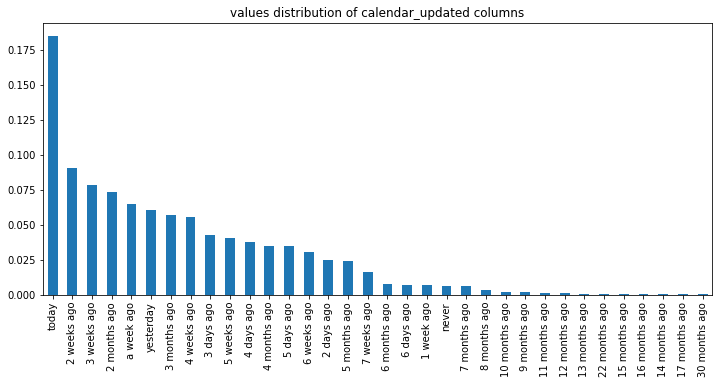

In [39]:
assess_nonnumeric(listings,'calendar_updated')

,index,room_type
0,count,3818
1,unique,3
2,top,Entire home/apt
3,freq,2541
0,Entire home/apt,0.665532
1,Private room,0.303824
2,Shared room,0.0306443


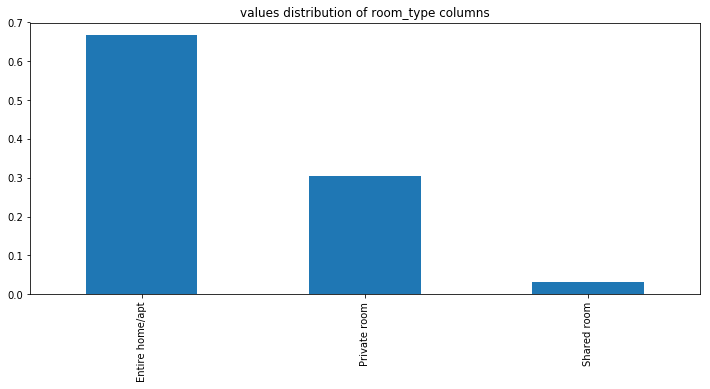

In [40]:
assess_nonnumeric(listings,'room_type')

,index,cancellation_policy
0,count,3818
1,unique,3
2,top,strict
3,freq,1417
0,strict,0.371137
1,moderate,0.327658
2,flexible,0.301205


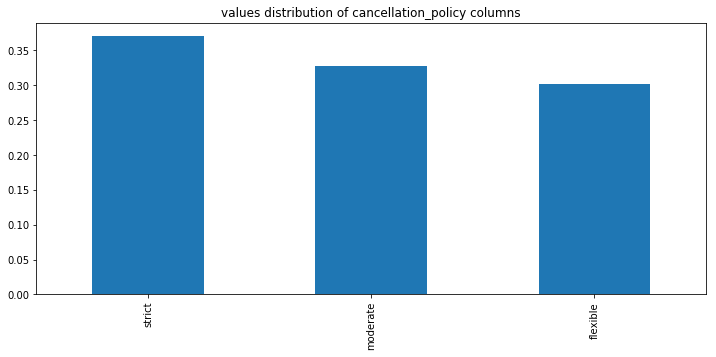

In [41]:
assess_nonnumeric(listings,'cancellation_policy')

,index,neighbourhood_group_cleansed
0,count,3818
1,unique,17
2,top,Other neighborhoods
3,freq,794
0,Other neighborhoods,0.207962
1,Capitol Hill,0.148507
2,Downtown,0.138816
3,Central Area,0.0966475
4,Queen Anne,0.0772656
5,Ballard,0.060241


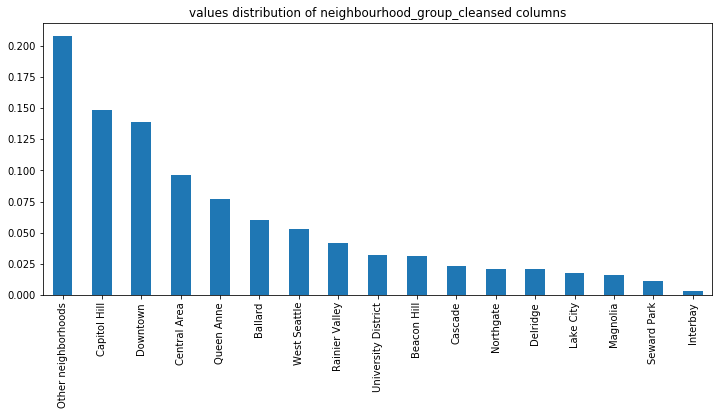

In [42]:
assess_nonnumeric(listings,'neighbourhood_group_cleansed')

,index,neighbourhood_cleansed
0,count,3818
1,unique,87
2,top,Broadway
3,freq,397
0,Broadway,0.103981
1,Belltown,0.0612886
2,Wallingford,0.0437402
3,Fremont,0.0413829
4,Minor,0.0353588
5,University District,0.0319539


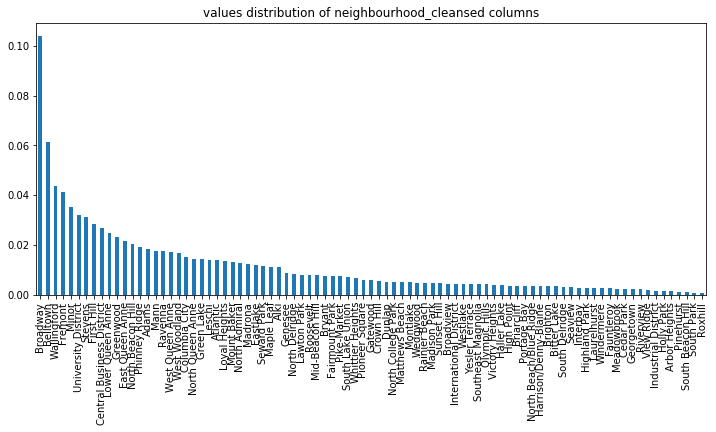

In [43]:
assess_nonnumeric(listings,'neighbourhood_cleansed')

,index,zipcode
0,count,3811
1,unique,28
2,top,98122
3,freq,420
0,98122,0.110005
1,98103,0.103195
2,98102,0.0887899
3,98105,0.0589314
4,98109,0.0529073
5,98101,0.0526454


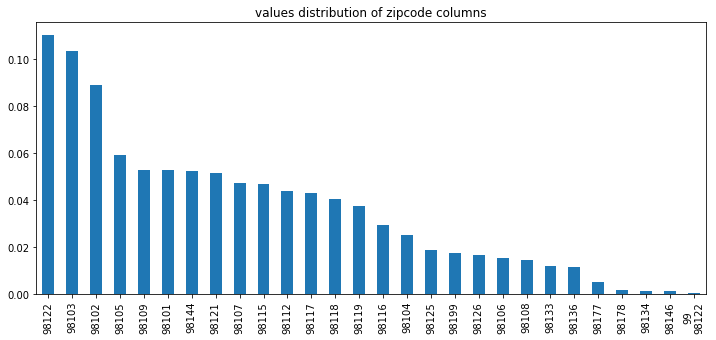

In [44]:
assess_nonnumeric(listings,'zipcode')

### Conclusion
 - The following 16 columns coming from 6 most Missing columns union 11 columns with unique value will be dropped.
     - ['security_deposit', 'last_scraped', 'market', 'license', 'has_availability', 'country_code', 'calendar_last_scraped', 'country', 'monthly_price', 'weekly_price', 'notes', 'requires_license', 'square_feet', 'jurisdiction_names', 'scrape_id', 'experiences_offered']
 - 37 no missing columns :(14 numeric columns, 23 nonnumeric columns), 23 nonnumeric columns are following:
     - 'smart_location','state','city' are also a column with unique value, because more thant 99% value is same. other value seem has the same meaning. so these columns will be removed.
     - 95% 'bed_type' is real bed, so I think it is a column with unique value. It can be dropped.
     - 'description','name' are descripsive columns, they can be dropped.
     - 'amenities' describes a basic configuration in room, they can be dropped.
     - 'neighbourhood_cleansed','street' will be dropped because other location colums provides similar information.
     - 'host_verifications' will be dropped because host_identity_verified provides same information.
     - 'require_guest_profile_picture' will be dropped because more thant 97.85% value is same as require_guest_phone_verification
     - 'calendar_updated'  will be dropped because review dataset provides similar information.
     - 'host_url','listing_url'and 'picture_url' will be dropped because they provide less predictive information.
     - 'is_location_exact','require_guest_phone_verification','instant_bookable' are bool type and need imputation.
     - 'neighbourhood_group_cleansed',	'room_type','cancellation_policy' are string/category type and need be converted to  dummies variable.

 - 39 imputing columns :(13 numeric columns, 26 nonnumeric columns), 26 nonnumeric columns are following:
      - 'summary' are  duplicated colum and can be dropped because they are decomposed into more specific features thereafter. 
      - 'host_about','host_picture_url','neighborhood_overview','transit','host_name','space','host_location', 'host_has_profile_pic'  are descripsive columns, they have little impact on predictions and can be ignored.
      - 'last_review','first_review' are 	duplication	information and can be ignored. Review dataset also includes them.
      - 'neighbourhood' are duplication	information and can be ignored.		other colums provides similar information.
      - 'host_neighbourhood','host_thumbnail_url','xl_picture_url' are less prediction. They provide less predictive information.
      - 'host_is_superhost','host_identity_verified' are bool type and need to be	imputed.
      - 'host_response_time' is category type and need to be	imputed.
      - 'host_response_rate','host_acceptance_rate' are numeric type and need to be imputed.
      - 'host_since' are numeric type and can be converted to years since beginning.
      - 'zipcode','cleaning_fee','property_type','host_response_time' are category type  and need to be	imputed. zipcode has invisible char and can be corrected. And proper_type has incorrect value(e.g. Bed & Breakfast), but the ratio is small and can be ignored.
      - 'medium_url','thumbnail_url' are category type and can be converted to  1 if value exit, or 0. it means airbnb are linked to social medium.

#### 2.2.3 Assess reviews dataset

In [45]:
get_base_info(reviews)

The dataset contains 84849 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84832 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB

Show the dataset example:
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a


5 no missing columns are following:
 ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name']

0 most missing columns are following:
 []

1 imputing columns are following:
 ['comments']


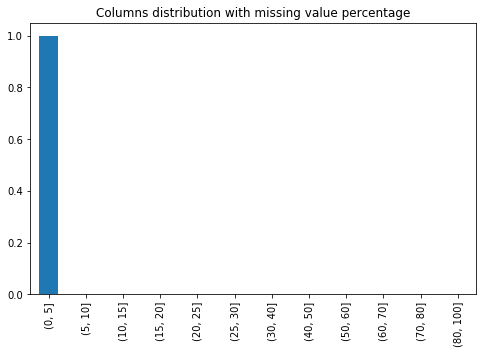

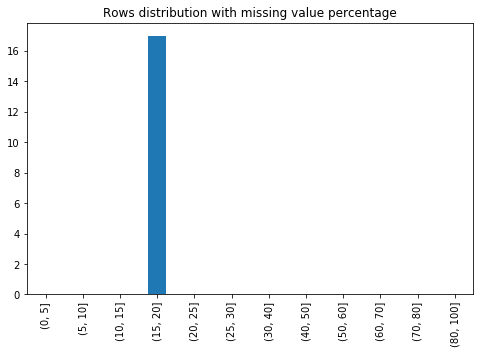

In [46]:
full_cols_r, most_missing_cols_r , impute_cols_r=assess_missing_value(reviews)
print_cols_list(full_cols_r,'no missing')
print_cols_list(most_missing_cols_r,'most missing')
print_cols_list(impute_cols_r,'imputing')

In [47]:
unique_cols_r=assess_unique_value(reviews)
print_cols_list(unique_cols_r,'unique')


0 unique columns are following:
 []


In [94]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_r_list=reviews.columns.values.tolist()
drop_cols_r=union_cols_list(most_missing_cols_r,unique_cols_r)
keep_cols_r=minus_cols_list(all_cols_r_list,drop_cols_r)
keep_full_cols_r=intersection_cols_list(keep_cols_r,full_cols_r)
keep_impute_cols_r=intersection_cols_list(keep_cols_r,impute_cols_r)

print_cols_list(drop_cols_r,'dropping')
print_cols_list(keep_full_cols_r,'no missing')
print_cols_list(keep_impute_cols_r,'imputing')



0 dropping columns are following:
 []

5 no missing columns are following:
 ['listing_id', 'id', 'reviewer_id', 'date', 'reviewer_name']

1 imputing columns are following:
 ['comments']


In [95]:
#%debug
check_nonnumeric_cols(reviews[keep_full_cols_r])


Show the dataset example:
         date reviewer_name
0  2015-07-19        Bianca
1  2015-07-20         Frank
2  2015-07-26           Ian
3  2015-08-02        George
4  2015-08-10          Ming


['date', 'reviewer_name']

### Conclusion for review dataset
The dataset contains 84849 rows and 6 columns.
- 5 no missing columns are following:
  - 'listing_id', 'id',  'reviewer_id' are numeric columns.
  - 'date' column should be converted to datetime type.
  - 'reviewer_name' column provides duplicated information and reviewer_id can replace it.
- 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. but we can count it as ocupation rate.
  
  


## 3 Data Preparation
 - Prepare lists for data clean
     - create column handling list based on data assessment.because these original columns shows as other types.
     - classify by types : verify data type based on classification
         - numeric columns list
         - datetime columns list
         - bool columns list
         - category columns list
 - Data Clean
     - drop columns or rows
     - verify data type for columns
         1. Check if any columns are of different data types than you would expect ex: 
           - 1) numbers showing as strings
           - 2) String includes invisible char.
         2. Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.     
     - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.

In [50]:
def initial_classify_types(df,drop_cols_list):
    """
    function description:
      Get the inital dtype columns.
    Input:
        df:Dateframe, the target dataframe.
        drop_cols_list: drop columns list based on value distribution.
    Return:
        result: dict={dtype:list}, get the initial information from dataset.
    """
    result={}
    dtype_dict={'datetime':'datetime','numeric':np.number,'bool':'bool','category':'object'}
    for k,v in dtype_dict.items():
         result[k]=df.select_dtypes(include=[v]).columns.values.tolist()
            
    # drop colum names also is removed from target after creating intial resut.
    for k, v in result.items():
        result[k]=minus_cols_list(result[k],drop_cols_list)   
    return result

In [103]:
def adjust_cols_list(df,assess_result,drop_cols_list): 
    """
    function description:
      classify by types : 
      - Get the inital dtype columns.
      - adjust dtype columns list based on the assessment result
    Input:
        assess_result:dict={dtype:list}, assessment result of dataset.
        drop_cols_list: drop columns list based on value distribution.
    Return:
        dtype_dict: dict={dtype:list},adjusted dtype dict based on the assessment result
    """
    # Get the inital dtype columns.
    dtypes_dict=initial_classify_types(df,drop_cols_list)
    # union for same data type, minus for diff data type
    for k, v in dtypes_dict.items():
        for ak,av in assess_result.items():
            if k == ak :
                dtypes_dict[k]=union_cols_list(dtypes_dict[k],assess_result[ak])
            elif ak !='drop':
                dtypes_dict[k]=minus_cols_list(dtypes_dict[k],assess_result[ak]) 
                
    # drop colum names also is removed from target after adjusting dtypes_dict.
    for k, v in dtypes_dict.items():
        dtypes_dict[k]=minus_cols_list(dtypes_dict[k],assess_result['drop'])
    
    # create the total drop columns list
    dtypes_dict['drop'] = assess_result['drop']+drop_cols_list
    # show result
    for k, v in dtypes_dict.items():
        print_cols_list(dtypes_dict[k],k)
   
    return dtypes_dict

In [52]:
"""
verify data type for columns
Check if any columns are of different data types than you would expect ex:
1) numbers showing as strings
2) String includes invisible char.
"""
def del_series_special_char(df_series, special_char,target_char=''):
    return df_series.str.replace(special_char,target_char) 

def del_df_special_char(df, special_char_string='$,'):
    """
    Function description:
      remove special char in object/string columns
    Input:
      df: Dataframe, dataset with only object/string columns.
      special_char_string:string, special char string. default is '$,'.
    Retrun:
      df:  Dataframe, dataset with only object/string columns after handling.
    """
    special_char_list=list(special_char_string)
    for col in df.columns.values.tolist():
        for s in special_char_list:
            df[col]= del_series_special_char(df[col], s)
    return df


### 3.1 Data Preparation for calendar
### calendar assessment conclusion
 - No missing value columns: listing_id ,date ,available
      - data colum should be converted to datatime type.
      - available column should be convert to bool type.
 - Price column with about missing value. they miss value while available is false. the rows with missing price value can be set to 0. Special char e.g. '$ ,' should be removed. the column should be coverted to float type.
#### 3.1.1 Prepare lists for data clean

In [65]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_c={}
assess_result_c['drop']=[]
assess_result_c['datetime']=['date']
assess_result_c['numeric']=['price']
assess_result_c['bool']=['available']
assess_result_c['category']=[]
print(assess_result_c)

{'drop': [], 'datetime': ['date'], 'numeric': ['price'], 'bool': ['available'], 'category': []}


In [66]:
dtypes_c_dict=adjust_cols_list(calendar,assess_result_c,drop_cols_c)


1 datetime columns are following:
 ['date']

1 bool columns are following:
 ['available']

2 numeric columns are following:
 ['price', 'listing_id']

0 category columns are following:
 []

0 drop columns are following:
 []


In [55]:
#numbers showing as strings
numeric_list=assess_result_c['numeric']
calendar[numeric_list]=del_df_special_char(calendar.loc[:,numeric_list])
calendar[numeric_list].head()    

,price
0,85.00
1,85.00
2,NaN
3,NaN
4,NaN


#### 3.1.2 Data clean

In [67]:
#drop columns or rows
if len(assess_result_c['drop']) > 0:
    calendar.drop(assess_result_c['drop'], inplace=True )

In [68]:
# convert date to datetime
for d in assess_result_c['datetime']:
    calendar[d] = pd.to_datetime(calendar[d])
calendar[assess_result_c['datetime']].head()

,date
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08


In [69]:
# impute price column
calendar[['price']]=calendar[['price']].fillna(0).astype(float)
calendar[['price']].head()

,price
0,85.0
1,85.0
2,0.0
3,0.0
4,0.0


In [70]:
# convert available column to binary category
mapping={'t':True, 'f':False}
calendar['available']=calendar['available'].map(mapping)

In [71]:
get_base_info(calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     0 non-null object
price         1393570 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB

Show the dataset example:
   listing_id       date available  price
0      241032 2016-01-04       NaN   85.0
1      241032 2016-01-05       NaN   85.0
2      241032 2016-01-06       NaN    0.0
3      241032 2016-01-07       NaN    0.0
4      241032 2016-01-08       NaN    0.0


### 3.2 Data Preparation for listings
#### 3.2.1 Prepare lists for data clean

In [109]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_l={}
# drop columns in no missing part.
assess_result_l['drop']=['state','smart_location','host_url','listing_url','picture_url','host_verifications',
                         'description','name','city','neighbourhood_cleansed','amenities','street','bed_type',
                         'require_guest_profile_picture','calendar_updated'] 
assess_result_l['datetime']=[]
assess_result_l['bool']=['is_location_exact','require_guest_phone_verification','instant_bookable']
assess_result_l['numeric']=['price','extra_people']
assess_result_l['category']=['neighbourhood_group_cleansed','room_type','cancellation_policy']
# drop columns in imputation part.
assess_result_l['drop'] +=['summary','host_about','last_review','host_picture_url','host_neighbourhood',
                                'neighborhood_overview','transit','host_thumbnail_url','host_name','space','xl_picture_url',
                                'first_review','host_location','neighbourhood','host_has_profile_pic']
assess_result_l['bool'] +=['host_is_superhost','host_identity_verified']
assess_result_l['numeric'] +=['host_response_rate','host_since','host_acceptance_rate']
assess_result_l['category'] +=['zipcode','cleaning_fee','property_type','medium_url','thumbnail_url','host_response_time']
#print(assess_result_l)

In [105]:
#adjust dtype columns list based on the assessment result
dtypes_l_dict=adjust_cols_list(listings,assess_result_l,drop_cols_l)


0 datetime columns are following:
 []

5 bool columns are following:
 ['instant_bookable', 'is_location_exact', 'host_identity_verified', 'host_is_superhost', 'require_guest_phone_verification']

32 numeric columns are following:
 ['availability_90', 'review_scores_checkin', 'latitude', 'bedrooms', 'host_since', 'availability_365', 'minimum_nights', 'availability_30', 'review_scores_communication', 'maximum_nights', 'guests_included', 'longitude', 'calculated_host_listings_count', 'availability_60', 'bathrooms', 'review_scores_cleanliness', 'review_scores_rating', 'review_scores_location', 'accommodates', 'host_listings_count', 'reviews_per_month', 'host_response_rate', 'beds', 'review_scores_accuracy', 'host_acceptance_rate', 'review_scores_value', 'number_of_reviews', 'extra_people', 'host_id', 'id', 'host_total_listings_count', 'price']

9 category columns are following:
 ['neighbourhood_group_cleansed', 'cleaning_fee', 'thumbnail_url', 'cancellation_policy', 'room_type', 'zipcode'

#### 3.2.2 Data clean

In [127]:
#clean the drop columns or rows
if len(assess_result_l['drop']) > 0:
    clean_listings_cols = minus_cols_list(all_cols_l_list,dtypes_l_dict['drop'])
    clean_listings= listings.loc[:,clean_listings_cols]
#get_base_info(clean_listings)
        

In [128]:
# clean bool columns. t=True, f=False
mapping={'t':True,'f':False}
for col in assess_result_l['bool']:
    clean_listings[col]=clean_listings[col].map(mapping)

clean_listings[assess_result_l['bool']].head()


,is_location_exact,require_guest_phone_verification,instant_bookable,host_is_superhost,host_identity_verified
0,True,False,False,False,True
1,True,True,False,True,True
2,True,False,False,False,True
3,True,False,False,False,True
4,True,False,False,False,True


In [137]:
#Convert object to numeric.
obj2num_list_l=listings[dtypes_l_dict['numeric']].select_dtypes(include=['object'])
print(obj2num_list_l.head())
assess_result_l['numeric']

   host_since host_response_rate host_acceptance_rate extra_people    price
0  2011-08-11                96%                 100%        $5.00   $85.00
1  2013-02-21                98%                 100%        $0.00  $150.00
2  2014-06-12                67%                 100%       $25.00  $975.00
3  2013-11-06                NaN                  NaN        $0.00  $100.00
4  2011-11-29               100%                  NaN       $15.00  $450.00


['price',
 'extra_people',
 'host_response_rate',
 'host_since',
 'host_acceptance_rate']

In [140]:
from datetime import datetime
current_date=datetime(2017,1,2)
detal_days=lambda x: (current_date-x).days
clean_listings['host_since']=pd.to_datetime(clean_listings['host_since']).apply(detal_days)

In [157]:
print("Is there any missing value in the column? {}".format(clean_listings['host_since'].isnull().sum()))

Is there any missing value in the column? 2


In [158]:
clean_listings['host_since'].mean()

1201.2735849056603

In [163]:
# clean string
obj2num_l_list=minus_cols_list(assess_result_l['numeric'] , ['host_since'])
clean_listings[obj2num_l_list]=del_df_special_char(clean_listings.loc[:,obj2num_l_list],'$,%')

In [169]:
clean_listings[obj2num_l_list]=clean_listings[obj2num_l_list].astype(float)
get_base_info(clean_listings[obj2num_l_list])

The dataset contains 3818 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
extra_people            3818 non-null float64
host_response_rate      3295 non-null float64
price                   3818 non-null float64
host_acceptance_rate    3045 non-null float64
dtypes: float64(4)
memory usage: 119.4 KB

Show the dataset example:
   extra_people  host_response_rate  price  host_acceptance_rate
0           5.0                96.0   85.0                 100.0
1           0.0                98.0  150.0                 100.0
2          25.0                67.0  975.0                 100.0
3           0.0                 NaN  100.0                   NaN
4          15.0               100.0  450.0                   NaN


## Test Area

### Clean Calendar dataset

In [ ]:
calendar.loc[calendar['price'].isnull(), ['available','price']].groupby(['available']).count()

Based on above result, missing price rooms are all unavailble.

In [ ]:
#calendar_clean=calendar.loc[calendar['price'].notnull(),:].copy()

In [ ]:
# Get the data type of listings
print(listings.info())
# analyze missing data rate for columns in listings
listings_missing_rate=listings.isnull().mean()*100
print(listings_missing_rate)
# Get the listings example
listings.head()

In [ ]:
# Get the data type of reviews
print(reviews.info())
# analyze missing data rate for columns in reviews
reviews_missing_rate=reviews.isnull().mean()*100
print(reviews_missing_rate)
# Get the listings example
reviews.head()

In [ ]:
# Check columns distribution 
bins=[0,5,10,15,20,25,30,40,50,60,80,100]
reviews_missing_col_cuts=pd.cut(reviews_missing_rate,bins)
pd.value_counts(reviews_missing_col_cuts, sort=False).plot('bar')

In [ ]:
# Check missing data in row distribution 
reviews_missing_row=reviews.isnull().mean(axis=1)*100
bins=[0,5,10,15,20,25,30,40,50,60,80,100]
reviews_missing_row_cuts=pd.cut(reviews_missing_row,bins)
pd.value_counts(reviews_missing_row_cuts, sort=False).plot('bar')